# Modelo para reconocimiento de prendas

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [56]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [57]:
train_images.shape

(60000, 28, 28)

Tenemos 60000 imágenes de 28x28

In [58]:
len(train_labels)

60000

In [59]:
test_images.shape

(10000, 28, 28)

In [60]:
# Tipos de ropa/accesorio
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
class_name = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [62]:
print("Elemento 125", train_labels[125])

Elemento 125 2


In [63]:
class_name[2]

'Pullover'

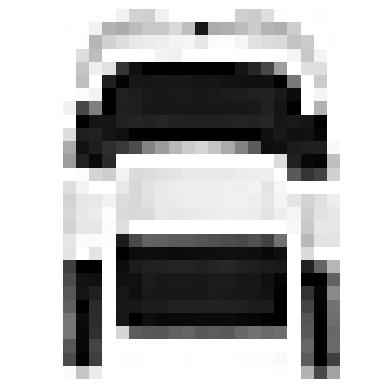

In [64]:
plt.imshow(train_images[125], cmap="binary")
plt.axis("off")
plt.show()

In [65]:
print("Valor máximo:",  max(train_images[125].reshape(784)))
print("Valor mínimo:",  min(train_images[125].reshape(784)))
print("Imagen 125:", train_images[125])

Valor máximo: 255
Valor mínimo: 0
Imagen 125: [[  0   0   0   0   0   0   0   0  13  45  48  14   0   0   0   0   0  47
   52  33   1   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0  13  75  84  67  55  55  39  64 230  83  79  66
   51  74  80  49   0   0   0   0   0   0]
 [  0   0   0   0   0   1  74  46  34  23  20  17  11  10  24   4   2   9
   29  35  37  60  51   0   1   0   0   0]
 [  0   0   0   0   0  34  65   0   0   0   0  13  14   0   0   0   0   0
    0   0   0  10  55  11   0   0   0   0]
 [  0   0   0   0   0  58  16  30 202 239 255 255 255 255 255 255 254 234
  216 184  97   0  31  33   0   0   0   0]
 [  0   0   0   0   0  64   0 225 251 233 234 233 232 233 235 234 236 238
  238 239 254 135   0  52   0   0   0   0]
 [  0   0   0   0   0   3  13 255 221 226 229 230 229 229 230 229 227 226
  223 220 229 244   0  10   0   0   0   0]
 [  0   0   0   0  14 184 128 255 224 225 230 232 231 231 232 230 231 230
  229 222 234 255   0  78   0   0   0   0]
 [  0   0   0   0 

In [66]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [67]:
print("Valor máximo:",  max(train_images[125].reshape(784)))
print("Valor mínimo:",  min(train_images[125].reshape(784)))
print("Imagen 125:", train_images[125])

Valor máximo: 1.0
Valor mínimo: 0.0
Imagen 125: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.05098039 0.17647059 0.18823529 0.05490196
  0.         0.         0.         0.         0.         0.18431373
  0.20392157 0.12941176 0.00392157 0.         0.         0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00392157 0.
  0.05098039 0.29411765 0.32941176 0.2627451  0.21568627 0.21568627
  0.15294118 0.25098039 0.90196078 0.3254902  0.30980392 0.25882353
  0.2        0.29019608 0.31372549 0.19215686 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00392157
  0.29019608 0.18039216 0.13333333 0.09019608 0.07843137 0.06666667
  0.04313725 0.03921569 0.09411765 0.01568627 0.00784314 0.03529412
  0.11372549 0.1372549  0.14509804 0.23529412 0.2        0.
  0.00392157 0.         0.         0.        ]
 [0.         0.         0. 

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7954 - loss: 0.5960
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8703 - loss: 0.3648
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8800 - loss: 0.3263
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8884 - loss: 0.3041
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8959 - loss: 0.2804
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8973 - loss: 0.2713
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9064 - loss: 0.2524
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9089 - loss: 0.2424
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9148 - loss: 0.2298
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9153 - loss: 0.2252


In [71]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.3189


In [72]:
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.31598368287086487
Test accuracy: 0.890500009059906


In [73]:
predictions = np.round(model.predict(test_images), 2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
predictions

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [75]:
print(predictions[98])
print(np.argmax(predictions[98]))
print(test_labels[98])

[0.   0.   0.53 0.   0.23 0.   0.24 0.   0.   0.  ]
2
4


In [76]:
print(class_name[2])
print(class_name[4])

Pullover
Coat


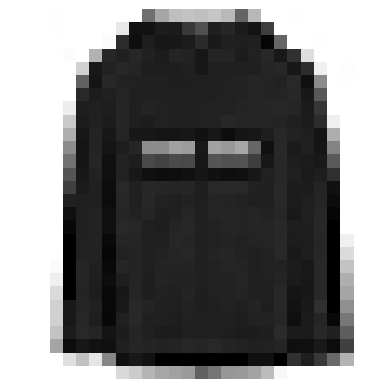

In [77]:
plt.imshow(test_images[98], cmap="binary")
plt.axis("off")
plt.show()

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
7
Bag
Bag


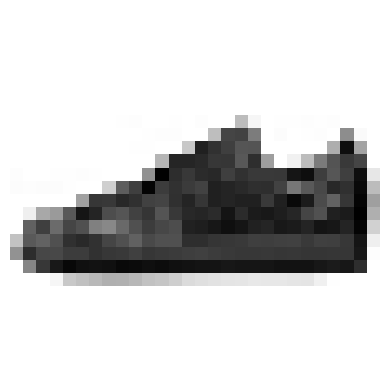

In [78]:
print(predictions[22])
print(np.argmax(predictions[22]))
print(test_labels[22])

print(class_name[np.argmax(predictions[22])])
print(class_name[test_labels[22]])

plt.imshow(test_images[22], cmap="binary")
plt.axis("off")
plt.show()

In [79]:
model.save("zalando.keras")